In [18]:
import re, os, sys
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def load_cd10(filepath):
    cd10 = pd.read_csv(filepath, index_col = 0)
    pattern = re.compile('\\(([0-9]+),.*')
    cd10['c_ids'] = cd10['c_ids'].map(lambda r: int(pattern.match(r).group(1)) if pattern.match(r) is not None else 0)
    return cd10

def load_targets(filepath):
    targets = pd.read_csv(filepath, index_col=0)
    targets = targets.set_index('rule_id')
    targets = targets[['compound_id', 'object_id', 'object_external_id', 'object_name', 'predicate_name', 'ref_name']]
    targets.index.name = None
    return targets

def fix_counts(counts):
    column = counts.columns[0]
    return pd.DataFrame(counts[column])\
        .rename(columns={column: 'count'}).reset_index()

targets = load_targets('data/nt650-targets.csv')
print(len(targets))

5373


In [32]:
ref_counts = fix_counts(targets.groupby('ref_name').count())
ref_counts
pred_counts = fix_counts(targets.groupby(['ref_name', 'predicate_name']).count())
pred_counts
targ_counts = fix_counts(targets.groupby(['ref_name', 'object_name']).count())
targ_counts


,ref_name,object_name,count
0,chembl:activity,Acetylcholine receptor; alpha1/beta1/delta/gamma,1
1,chembl:activity,Acetylcholinesterase,11
2,chembl:activity,Adenosine A1 receptor,24
3,chembl:activity,Adenosine A2 receptor,12
4,chembl:activity,Adenosine A2a receptor,18
5,chembl:activity,Adenosine A2b receptor,9
6,chembl:activity,Adenosine A3 receptor,10
7,chembl:activity,Adenosine deaminase,2
8,chembl:activity,Adenosine receptor,2
9,chembl:activity,Adenylate cyclase,2


In [11]:
targ_counts.sort_values('count')

,ref_name,object_name,count
0,chembl:activity,Acetylcholine receptor; alpha1/beta1/delta/gamma,1
405,drugbank:targets:human,5-hydroxytryptamine receptor 1D,1
154,chembl:activity,Opioid receptors; mu/kappa/delta,1
404,drugbank:targets:human,5-hydroxytryptamine receptor 1B,1
156,chembl:activity,P2X purinoceptor 4,1
157,chembl:activity,Peripheral-type benzodiazepine receptor,1
158,chembl:activity,Phenylethanolamine N-methyltransferase,1
159,chembl:activity,Phosphodiesterase 1,1
403,drugbank:targets:human,"4-aminobutyrate aminotransferase, mitochondrial",1
161,chembl:activity,Phosphodiesterase 3B,1


In [ ]:
"""
    - chembl:activity has everything
    - chembl:mechs has real mechanisms and are super solid, but they're sparse
    - chembl:mechs:superset might have fewer distinct targets (super solid)
    - drugbank:targets are supersuper solid but very sparse
    - libraries:biomol:targets: good and covers every compound, but often restricts to 1 target per compound
    
    *****
    eliminate targets w only one compound?
    separate by references
    what to do about the compounds w 2/multiple targets
    look at the unique predicates in each ref
    *****
"""

In [16]:
b = [0,0,0,0,0,0]

for receptor in targ_counts["count"]:
    if receptor == 1:
        b[0] += 1
    elif receptor <= 20:
        b[1] += 1
    elif receptor <= 40:
        b[2] += 1
    elif receptor <= 60:
        b[3] += 1
    elif receptor <= 80:
        b[4] += 1
        # print(the receptor name?)
    else:
        b[5] += 1

print(b)

[201, 301, 54, 21, 7, 4]


In [41]:
targ_counts = targ_counts.sort_values('count', ascending=False)
filtered_targ_counts = targ_counts[targ_counts['count']>1]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 146.95)

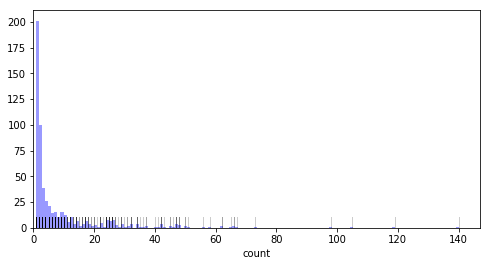

In [56]:
import seaborn as sns
figure = plt.figure(figsize=(8, 4))
ax = figure.add_subplot(1,1,1)
sns.distplot(targ_counts['count'], bins=140, kde=False, rug=True, rug_kws={'color': 'black', 'alpha': 0.2}, color='blue', ax=ax)
# TODO set alpha
ax.set_xlim(0, )


In [ ]:
"""
Going to have:
    - 5 replicate wells per compound
    
"""

<function matplotlib.pyplot.show(*args, **kw)>

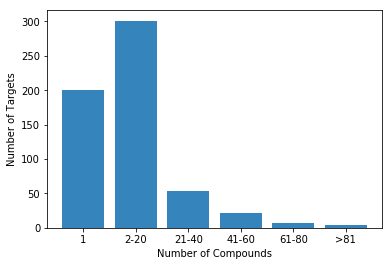

In [26]:
objects = ('1', '2-20', '21-40', '41-60', '61-80', '>81')
y_pos = np.arange(len(objects))
performance = b
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.xlabel('Number of Compounds')
plt.ylabel('Number of Targets')
plt.title('')
plt.show

In [35]:
i = 0

for k in targ_counts["count"]:
    if k == 1:
        new = targ_counts.drop(labels=i)
    i += 1

new

,ref_name,object_name,count
0,chembl:activity,Acetylcholine receptor; alpha1/beta1/delta/gamma,1
1,chembl:activity,Acetylcholinesterase,11
2,chembl:activity,Adenosine A1 receptor,24
3,chembl:activity,Adenosine A2 receptor,12
4,chembl:activity,Adenosine A2a receptor,18
5,chembl:activity,Adenosine A2b receptor,9
6,chembl:activity,Adenosine A3 receptor,10
7,chembl:activity,Adenosine deaminase,2
8,chembl:activity,Adenosine receptor,2
9,chembl:activity,Adenylate cyclase,2


In [7]:
def n_predicates(targets, ref_name):
    filtered = targets[targets['ref_name'] == ref_name]
    return fix_counts(filtered.groupby('predicate_name').count())
n_predicates(targets, 'chembl:activity')

,predicate_name,count
0,reported_activity,1709


In [ ]:
#targets with one compound?